# Mini Projeto de Análise de Dados

### O que temos?

Temos os dados de 2019 de uma empresa de prestação de serviços. 

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados


### O que queremos saber/fazer?

1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa? <br>
    
    
2. Qual foi o faturamento da empresa?<br>
    
    
3. Qual o % de funcionários que já fechou algum contrato?<br>
    Na base de serviços temos o funcionário que fechou cada serviço. Mas nem todos os funcionários que a empresa tem já fecharam algum serviço.<br>
    . Na base de funcionários temos uma lista com todos os funcionários<br>
    . Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais<br>
    . Para calcular a qtde de funcionários que fecharam algum serviço, use a base de serviços e conte quantos funcionários tem ali. Mas lembre-se, cada funcionário só pode ser contado uma única vez.<br><br>
    Dica: se você aplicar o método .unique() em uma variável que é apenas 1 coluna de um dataframe, ele vai excluir todos os valores duplicados daquela coluna.<br>
    Ex: unicos_colunaA = dataframe['colunaA'].unique() te dá como resposta uma lista com todos os itens da colunaA aparecendo uma única vez. Todos os valores repetidos da colunaA são excluidos da variável unicos_colunaA 
    
    
4. Calcule o total de contratos que cada área da empresa já fechou


5. Calcule o total de funcionários por área


6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?<br>

Opções usuais de encoding:<br>
encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então encoding='cp1252'

Observação Importante: Se o seu código der um erro na hora de importar os arquivos:<br>
- CadastroClientes.csv
- CadastroFuncionarios.csv

In [8]:
import pandas as pd

ba_serv = pd.read_excel(r"BaseServiçosPrestados.xlsx")
cd_clie = pd.read_csv(r"CadastroClientes.csv", sep=';')
cd_funci = pd.read_csv(r"CadastroFuncionarios.csv", sep=';', decimal=',')

print('>> Importado: Servicos Prestados\n>> Importado: Cadastro Clientes\n>> Importado: Cadastro Funcionarios')

>> Importado: Servicos Prestados
>> Importado: Cadastro Clientes
>> Importado: Cadastro Funcionarios


R1 -  Valor Total da Folha Salarial

In [9]:
base_sum = cd_funci['Salario Base'].sum()
impostos_sum = cd_funci['Impostos'].sum()
beneficio_sum = cd_funci['Beneficios'].sum()
vt_sum = cd_funci['VT'].sum()
vr_sum = cd_funci['VR'].sum()

folha = base_sum + impostos_sum + beneficio_sum + vt_sum + vr_sum
print('O valor total da folha salarial eh: R${:,}'.format(folha))


O valor total da folha salarial eh: R$2,744,409.46


R2 - Qual foi o faturamento da empresa?

In [10]:
dataframe = cd_clie['Valor Contrato Mensal'] * ba_serv['Tempo Total de Contrato (Meses)']
print('O faturamento da empresa foi de: R${:_.2f}'.format(dataframe.sum()).replace('.', ',').replace('_', '.'))

O faturamento da empresa foi de: R$5.631.030,00


R3 - Qual o % de funcionários que já fechou algum contrato?

In [11]:
'''
qtde_funcionario_fecharamcontrato = len(servicos_df['ID Funcionário'].unique())
qtde_funcionario_total = len(funcionarios_df['ID Funcionário'])
print('Percentual Funcionários Fecharam Contrato: {:.2%}'.format(qtde_funcionario_fecharamcontrato / qtde_funcionario_total))
'''

identi_func = ba_serv['ID_Funcionário']
qtd_ordem = print('Quantidade de servicos prestados: {}'.format(len(identi_func)))

# removendo duplicidades:
funcionarios = sorted(set(identi_func))

quant_prest_serv_func = print('Quantidade de funcionarios que prestaram servicos: {}'.format(len(funcionarios)))
qtd_real_stf = (len(funcionarios))

cadastro_func = cd_funci['Nome Completo']; cadastro_func = len(cadastro_func);

count = int(qtd_real_stf) / int(cadastro_func)
print('{:.2%} funcionarios de um total de {}, fecharam algum contrato.'.format(count, cadastro_func))

Quantidade de servicos prestados: 238
Quantidade de funcionarios que prestaram servicos: 100
86.96% funcionarios de um total de 115, fecharam algum contrato.


R4 -  Calcule o total de contratos que cada área da empresa já fechou

In [12]:
cd_funci['Area']
areas = sorted(set(cd_funci['Area']))
unic_area = areas

dic = []
for i, n in enumerate(unic_area):
    if n != '':
        dic.append([n, 0])

contratos = []
for unic in unic_area:

    for i, area in enumerate(cd_funci['Area']):
        operario = cd_funci.loc[i, 'ID Funcionário']

        for i_i in ba_serv['ID_Funcionário']:
            if i_i == operario:

                for i, value in enumerate(dic):
                    if area == value[0]:
                        v = 1
                        value[1] += v
    break

count = 0
for i, value in enumerate(dic):
    h = value[1]
    count += h

print(f'O total de contratos concluídos de cada área da empresa foi de {count}, e por área:\n{dic}')

O total de contratos concluídos de cada área da empresa foi de 238, e por área:
[['Administrativo', 63], ['Comercial', 44], ['Financeiro', 42], ['Logística', 40], ['Operações', 48], ['Programação', 1]]


R5 - Calcule o total de funcionários por área

Por área, o total de funcionários é de:
[['Administrativo', 26], ['Comercial', 26], ['Financeiro', 18], ['Logística', 21], ['Operações', 23], ['Programação', 1]]


<AxesSubplot:ylabel='Area'>

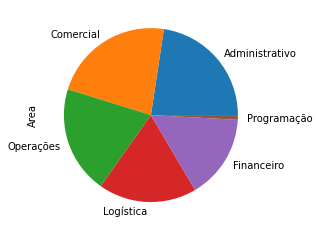

In [13]:
''' -> Another possible solution ;-;
areas = cd_funci['Area'].value_counts()
'''

cd_funci['Area']
areas = sorted(set(cd_funci['Area']))
unic_area = areas

dic = []
for i, a in enumerate(unic_area):
    if a != '':
        dic.append([a, 0])

for i, area in enumerate(dic):
    for funcio in cd_funci['Area']:
        if area[0] == funcio:
            area[1] += 1

print(f'Por área, o total de funcionários é de:\n{dic}')

areas = cd_funci['Area'].value_counts()
areas.plot(kind='pie')
    

R6 - Qual o ticket médio mensal (faturamento médio mensal) dos contratos?

In [14]:
print('O ticket medio mensal dos contratos foi de: R${:,.2f}'.format(cd_clie['Valor Contrato Mensal'].mean()))

O ticket medio mensal dos contratos foi de: R$2,502.56
